In [3]:
# ============================================================
# 📌 test_model.py — Test Single Image with Skin Cancer CNN Model
# ============================================================

# Importing Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### LOad Model + Class Name ###

In [4]:
# ============================================================
# 📌 Block 1: Load Class Names & Model
# ============================================================

class_names = ["Benign", "Malignant"]
print("Class Names:", class_names)

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import cv2

# Load model
model_path = "skin_cancer_cnn_finetuned.keras"
print("\nLoading model...")
model = tf.keras.models.load_model(model_path)
print("✅ Model Loaded Successfully!")


Class Names: ['Benign', 'Malignant']

Loading model...
✅ Model Loaded Successfully!


### Load & Display Test Image ###


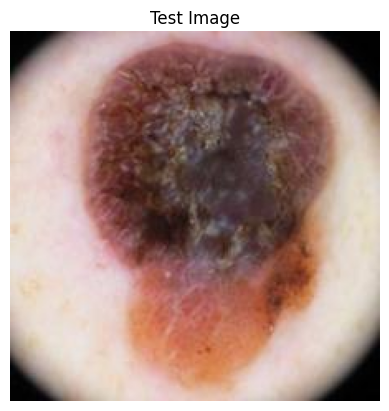

In [8]:
# ============================================================
# 📌 Block 2: Load & Display Image
# ============================================================

image_path = "test/Malignant/5603.jpg"   # Update if needed

img = cv2.imread(image_path)

if img is None:
    print("❌ ERROR: Image not found. Check the path!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Test Image")
    plt.axis("off")
    plt.show()


### Preprocess + Predict ###

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step

🔍 Raw Prediction Probability: 0.99998539686203
🎯 Predicted Class: Malignant


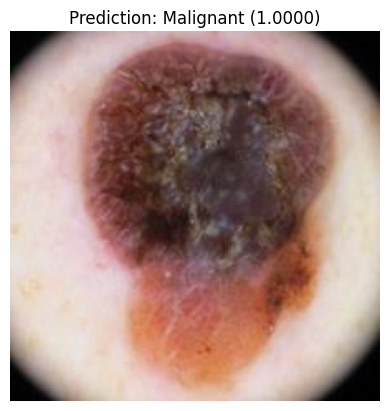

In [9]:
# ============================================================
# 📌 Block 3: Preprocess & Predict (Matches Training!)
# ============================================================

# Preprocess the input image same as training
input_img = load_img(image_path, target_size=(224, 224))
input_arr = img_to_array(input_img)
input_arr = input_arr / 255.0       # SAME AS ImageDataGenerator(rescale=1./255)
input_arr = np.expand_dims(input_arr, axis=0)

# Predict
prediction = model.predict(input_arr)
probability = float(prediction[0][0])

print("\n🔍 Raw Prediction Probability:", probability)

predicted_class = 1 if probability > 0.5 else 0
predicted_label = class_names[predicted_class]

print(f"🎯 Predicted Class: {predicted_label}")

# Show image with prediction
plt.imshow(img_rgb)
plt.title(f"Prediction: {predicted_label} ({probability:.4f})")
plt.axis("off")
plt.show()


In [12]:
# ============================================================
# 📌 Recreate test generator (same as training!)
# ============================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TEST_DIR = "test"                # folder containing Benign & Malignant
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False              # IMPORTANT for matching filenames
)


Found 2000 images belonging to 2 classes.


In [13]:
# ============================================================
# 📌 Predict ALL TEST IMAGES (2000 images)
# ============================================================

pred_probs = model.predict(test_generator, verbose=1)

pred_classes = (pred_probs > 0.5).astype(int).reshape(-1)
filenames = test_generator.filenames
class_names = ["Benign", "Malignant"]

results = []

for i in range(len(filenames)):
    results.append({
        "filename": filenames[i],
        "predicted_class": class_names[pred_classes[i]],
        "probability": float(pred_probs[i][0])
    })

df_results = pd.DataFrame(results)
df_results.to_csv("test_predictions.csv", index=False)

print("\n🎉 All test predictions saved to: test_predictions.csv")


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step

🎉 All test predictions saved to: test_predictions.csv
